# Variables

In [1]:
# Uncomment lo siguiente para usarlo en Colab
# %%capture
# !pip install ipympl
# !git clone https://github.com/nico-tombolato/FormuLab temp
# !mv temp/* .

# from google.colab import output
# output.enable_custom_widget_manager()

In [2]:
from formulab.objects import *

Los objetos de tipo `objects.var` son variables que almacenan todos los atributos que tendría una variable estadística.\
Para inicializar, los argumentos necesarios son el nombre en formato string (puede contener subíndices y simbolos de latex, pero sin el backlash `\`) y el conjunto de mediciones realizados en una lista o un `dict`.\
Tambien se puede introducir un único valor, pero en este caso no podra calcular nada.

In [3]:
x = var('x_m', [1.1, 1.2, 1.1, 1.0], unit='m')
rho = var('rho', {'val': 10, 'sd': 1, 'n': 5}, unit='Omega m')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Las posibles entradas del `dict` son: 
* `values`: Lista de valores (como los de `x`)
* `val`: Valor medio
* `sd`: Desviación estándar
* `sdm`: Desviación estándar de la media
* `n`: Cantidad de mediciones
* `nu`: Grados de libertad
* `u`: Incertidumbre
* `valr`: Valor medio redondeado
* `u_st`: Intervalo de confianza con t de Student

Con los datos ingresados, el programa calculará toda la información posible. Si no se especifica, supondrá `nu = n-1`, si no se dió la desviación estándar `sd = sdm` y si se envía un único valor `n = 1`.

Hay argumentos adicionnales para la función:
* `alpha`: El nivel de significancia para el intervalo de confianza con t de Student, el `default` es `0.05` y puede ser modificado permanentemente en el archivo `formulab/config.py`. `0` Evita que se calcule
* `vbs`: El nivel de verbosidad, con `0` no mostrará nada al ejecutarse, `1` solo el valor final, `2` los pasos intermedios

In [4]:
y = var('y_2', [20,23,20,21,23,20], alpha=0.02, vbs=2)
z = var('z', 1, vbs=0) #No se muestra porque vbs=0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Acceder a los atributos de cada variable es simple, solo hay que llamarlos por su nombre, iguales a las entradas de `dict`.

In [5]:
x.n

4

In [6]:
rho.nu

4

In [7]:
y.sdm

0.6009252125773317

Y si se necesita el símbolo de la variable o de alguno de los atributos, hay que agregar `sym` previo al atributo.

In [8]:
x

x_{m}

In [9]:
rho.sym.nu

\nu_{\rho}

In [10]:
y.sym.sdm

s_{\overline{y2}}

También se puede volver a calcular una variable con el método `calc`, e imprimirla con el método `display`.

In [11]:
z.calc([5,5.1,4.9,5.5], vbs=0)

z

In [12]:
z.display(vbs=2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Parámetros

Para cantidades que no tienen incertidumbre, como constantes universales, o valores de referencia, se utiliza el objeto de tipo `objects.param`. Adicionalmente, la librería `sympy` (Ya importada en el primer bloque) tiene constantes almacenadas.

In [13]:
c = param('c', 299792458, 'm/s')

<IPython.core.display.Math object>

In [14]:
c

c

In [15]:
c.val

299792458

In [16]:
sp.pi

pi

# Funciones

Una funcion de tipo `objects.func` es inicializada de forma similar a una variable, indicando el nombre y la expresión es suficiente. Será automáticamente evaluada por defecto

In [17]:
f = func('f', rho/x, 'Omega', vbs=2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Sus argumentos adicionales son:
* `alpha`: Ya mencionado
* `calcEv`: Evaluar la expresión, `True` o `False`
* `calcU`: Calcular la incertidumbre (mediante propagación con derivadas parciales)
* `vbs`: Ya mencionado

Para evaluarla con otros valores se llama a la función directamente con un `dict` indicando los nuevos valores, utilizara los iniciales para aquellos que no sean específicados, retorna `dict` o `list` de `dict` (esto último si fue evaluado en una lista de valores).

In [18]:
f_1 = f({x: 3})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
f_2 = f({rho: [1,2,3], x.sym.sdm:10}, vbs=2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Notar que esto no modifica los valores almacenados en `x` o `rho`, para ello existe el método `calc` dentro de cada objeto.

Adicionalmente, se puede acceder a la expresión, a las derivadas parciales, sus expresiones, valores y símbolos que las representan.

In [20]:
f.f

\rho/x_{m}

In [21]:
f.expr.d[x]

-\rho/x_{m}**2

In [22]:
f.d[x]

-2.47933884297521

In [23]:
f.sym.d[x]

\frac{\partial f}{\partial x_{m}}

# Variables correlacionadas

Si se tienen dos cantidades correlacionadas, uno puede definir la covarianza entre ellas con la funcion `stats.set_cov`, permitiendo que realice el cálculo, o enviando como algumento el valor de la covarianza.\
Luego se puede acceder al atributo `cov` de una variable, que es un `dict` con la covarianza de esta con el resto.

In [24]:
from formulab import stats

In [25]:
a = var('a', [1,2,3,4], 'cm')
b = var('b', [4.3,5.7,5.3,5], 'cm')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
stats.set_cov(a, b, 20)
b.cov[a]

20

In [27]:
stats.set_cov(a, b)
a.cov[b]

0.2833333333333333

Luego esto se reflejará en el cálculo de la incertidumbre de una funcion y de grados de libertad efectivos

In [28]:
g = func('g', sp.pi*a*b+a**2, unit='cm^2', vbs=2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Y se puede acceder a la Matrix de covarianzas simbólica

In [29]:
g.sym.covMatrix

Matrix([
[s_{\overline{a}}**2,   s_{\overline{ba}}],
[  s_{\overline{ba}}, s_{\overline{b}}**2]])

# Listas de Variables

Si se realizan N conjuntos de mediciones de una cantidad, es conveniente almacenarlas juntas, en el tipo `objects.varList`. Y acceder a ellas llamando a la variable con el respectivo subíndice.

In [30]:
T = varList('T', [[23,23,23,24], [25,25,27,27,28], [30,30,28,29,30]], 'C')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [31]:
T(1)

T_{1}

In [32]:
T(2).val

26.4

In [33]:
T.u

array([0.2, 0.6, 0.4])

# Tablas

Los archivos de datos a introducir deben tener dos columnas para cada variable, el valor y la incertidumbre. Se debe inicializar una variable de tipo `objects.table` indicando el nombre del archivo, y en caso de no estar presente en el archivo, los nombres de las variables. \
Las variables se almacenaran en tipo `objects.varList` y son atributo de la tabla con el nombre que se les dio.

In [34]:
tabla = table('examples/data.dat', vbs=0)

In [35]:
tabla

|    | $V\, [V]$   | $u_{V}\, [V]$   | $l\, [m]$   | $u_{l}\, [m]$   |
|---:|:------------|:----------------|:------------|:----------------|
|  0 | $1.0$       | $0.1$           | $2.0$       | $0.1$           |
|  1 | $2.0$       | $0.1$           | $3.0$       | $0.1$           |
|  2 | $3.0$       | $0.1$           | $4.0$       | $0.1$           |
|  3 | $4.0$       | $0.1$           | $5.0$       | $0.1$           |
|  4 | $5.0$       | $0.1$           | $6.0$       | $0.1$           |

None

In [36]:
tabla.V

V

In [37]:
tabla.l.val, tabla.V.u

(array([2., 3., 4., 5., 6.]), array([0.1, 0.1, 0.1, 0.1, 0.1]))

A continuación se muestra el caso en que el archivo no tiene los nombres de las variables.

In [38]:
tabla = table('examples/datanh.dat', varNames='V [V], l [m]', vbs=0)

In [39]:
tabla

|    | $V\, [V]$   | $u_{V}\, [V]$   | $l\, [m]$   | $u_{l}\, [m]$   |
|---:|:------------|:----------------|:------------|:----------------|
|  0 | $1.0$       | $0.1$           | $2.0$       | $0.1$           |
|  1 | $2.0$       | $0.1$           | $3.0$       | $0.1$           |
|  2 | $3.0$       | $0.1$           | $4.0$       | $0.1$           |
|  3 | $4.0$       | $0.1$           | $5.0$       | $0.1$           |
|  4 | $5.0$       | $0.1$           | $6.0$       | $0.1$           |

None

In [40]:
tabla.V()

|    | $V\, [V]$   |
|---:|:------------|
|  0 | $1.0$       |
|  1 | $2.0$       |
|  2 | $3.0$       |
|  3 | $4.0$       |
|  4 | $5.0$       |

V

# Funciones de ajuste

Las funciones de ajuste son de tipo `objects.funcFit` y se requiere que los parámetros de ajuste sean de tipo `objects.var` y tanto la variable independiente, como la dependiente sean de tipo `objects.varList`. \
El cálculo retorna los valores apropiados de los parámetros de ajuste, la tabla de restos y los graficos interactivos de la función y los restos.

In [41]:
# Configuración inicial para gráficos interactivos
%matplotlib widget
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [42]:
a, b, c = var('a', -1), var('b', 2), var('c', 5)

x = varList('x', [{'val': -0.59, 'sd':0.1, 'n':6}, {'val': 0.27, 'sd':0.1, 'n':6}, {'val': 0.98, 'sd':0.1, 'n':6}, {'val': 1.87, 'sd':0.1, 'n':6}], 'm', vbs=0)

h = varList('h', [{'val': 0.55, 'sd':0.1, 'n':6}, {'val': 3.78, 'sd':0.1, 'n':6}, {'val': 4, 'sd':0.1, 'n':6}, {'val': 1.62, 'sd':0.1, 'n':6}], 'm', vbs=0)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|    | $r\, [m]$   |
|---:|:------------|
|  0 | $-0.02$     |
|  1 | $0.06$      |
|  2 | $-0.06$     |
|  3 | $0.02$      |

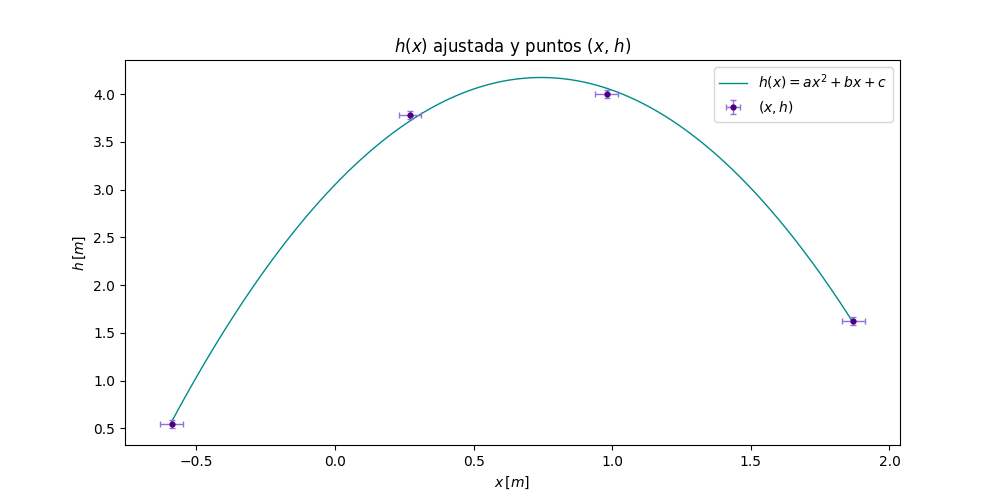

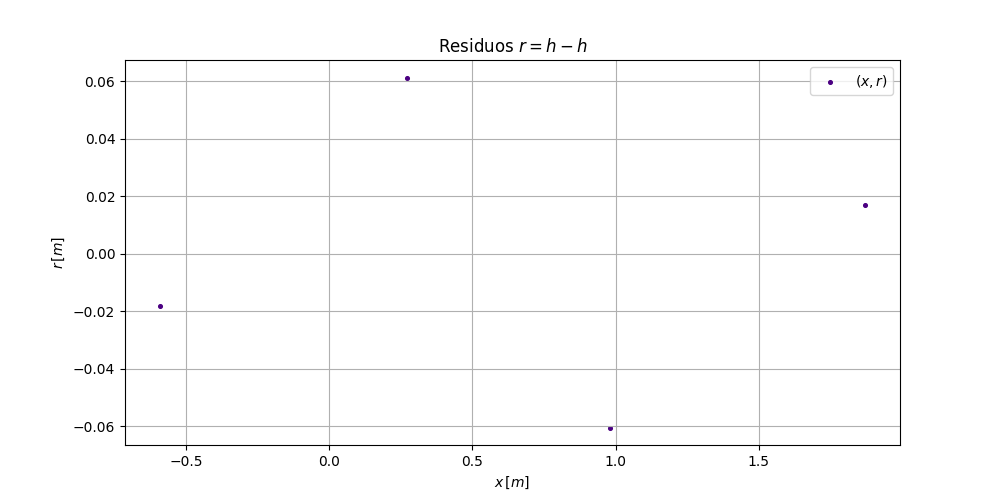

In [43]:
h_f = funcFit('h', a*x**2+b*x+c, h)

# Gráficos

Si la función no es de tipo `objects.funcFit`, es necesario indicar cuál es la variable independiente de la función y luego usar el método `plot`. \
Los argumentos de `plot` son:
* `ran`: Una tupla que indica el intervalo del gráfico
* `pts`: Entero que indique la cantidad de puntos a calcular
* `ref`: Identificacion para la figura que retorna, por defecto es la ID del `objects.func`
* Parámetros adicionales de personalización

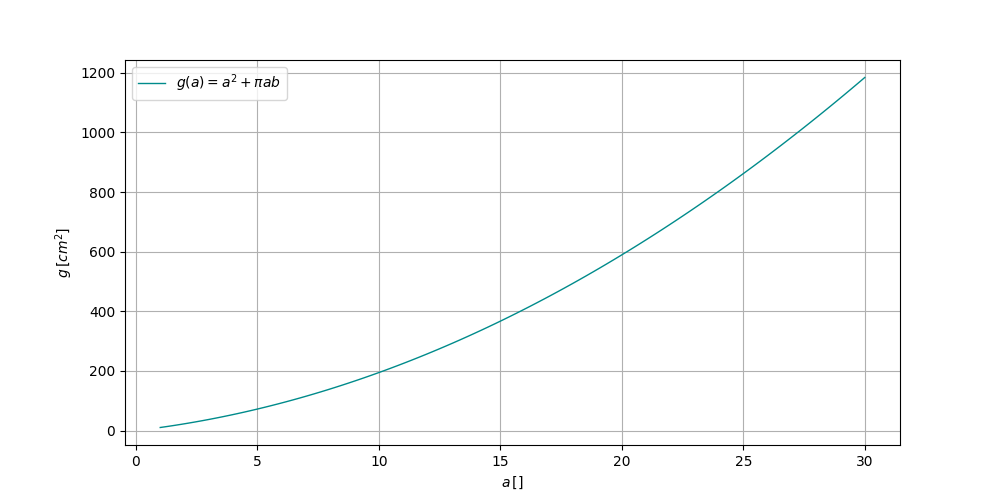

In [44]:
g.x=a
fig = g.plot((1,30))

Si se quiere graficar un conjunto de puntos `(x, y)` se deden utilizar las funciones de `plots`, en las que solo hay que introducir los conjuntos de puntos y los parámetros de personalización (opcionales).

In [45]:
from formulab import plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


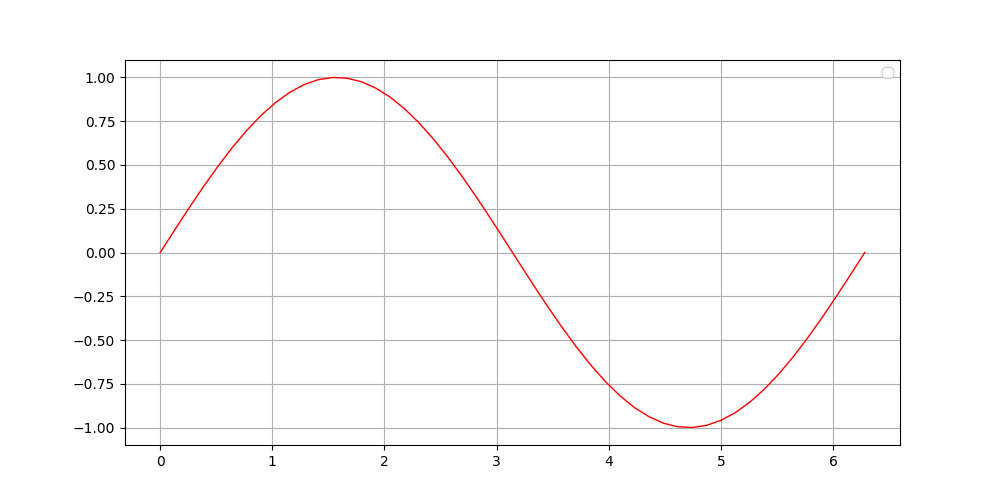

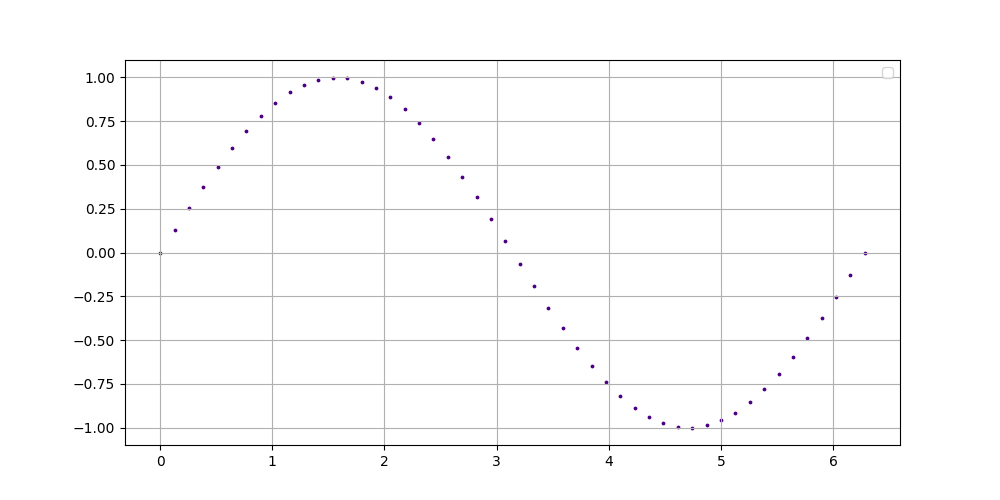

In [46]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
fig1, fig2 = plots.plot(x, y, ref=1, color='red'), plots.scatter(x, y, ref=2, dotsize=3)

# Pasco

Se pueden cargar archivos `.csv` exportados de PASCO Capstone y almacenarse en una variable de tipo `objects.pasco`.

In [47]:
psc = pasco('examples/pscdata.csv')

,Intensidad de campo magnético (G) Serie Nº 3,Intensidad de campo magnético (G) Serie Nº 4,Intensidad de campo magnético (G) Serie Nº 5
0,-3.587876,-3.774260,-3.759922
1,-3.734832,-3.774260,-3.648809
2,-3.501853,-3.774260,-3.695405
3,-3.555618,-3.770675,-3.756338
4,-3.702574,-3.770675,-3.702574
...,...,...,...
721,-3.774260,NaN,NaN
722,-3.774260,NaN,NaN
723,-3.774260,NaN,NaN
724,-3.774260,NaN,NaN


Si se quiere acceder a una serie (columna), se puede llamar la variable con una tupla indicando el sensor (si es que hay mas de uno) comenzando por `0` y el número de serie que indica la tabla. Otra forma es indicando el íncice absoluto de la columna comenzando por `0`.\
Este método tiene los siguientes argumentos:
* `ran`: tupla o lista indicando comienzo y fin del rango de filas deseado (EN UNIDADES DE TIEMPO, NO EN CANTIDAD DE FILAS)
* `plot`: Booleano para graficar el conjunto de puntos indicado

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


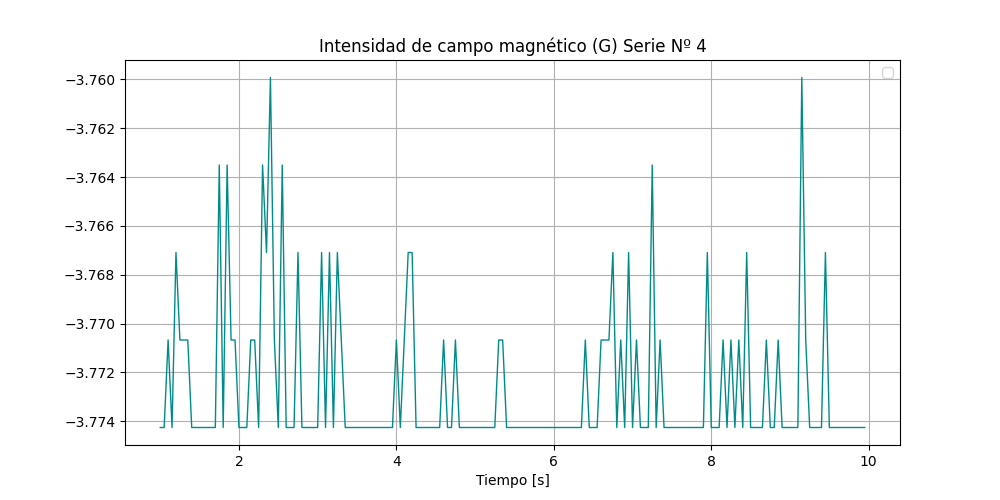

In [48]:
B_1 = psc((0,4), ran=(1,10), plot=True)

In [49]:
B_2 = psc(2, ran=(1,10))

Ahora se pueden hacer todos los calculos de esta lista de valores utilizando `objects.var`.

In [50]:
B_1, B_2 = var('B_1', B_1, 'G'), var('B_2', B_2, 'G')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Pruebas de hipótesis con t de Student

Las pruebas de hipótesis se realizan con la función `stats.t_test`. El procedimiento es automático para pruebas entre una variable de tipo `objects.var` y un parámetro de tipo `objects.param` o para dos variables.\
En este último caso analiza si las varianzas son homogéneas a través de la prueba con distribución F.

In [51]:
stats.t_test(B_1, B_2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>